# An SEIR Model of Seasonal Infectious Diseases

In [1]:
# for various mathematical functions
import numpy as np

# for plotting numerical simulation results
import matplotlib.pyplot as plt

# for carrying out numerical integration of ODEs
from scipy.integrate import odeint

# for generating interpolating functions
from scipy.interpolate import UnivariateSpline

We first enter the initial coditions for the proportion of each section of the population.

In [2]:
# initial proportion of exposed individuals
E0 = 0

# initial proportion of infective individuals
I0 = (1/np.exp(43/5))

# initial proportion of removed individuals
R0 = 0

# initial proportion of susceptible individuals
S0 = 1 - E0 - I0 - R0

# a vector for the initial conditions
y0 = [S0, E0, I0]

Next, we introduce the SEIR model with the product of the contact rate and transmission probability, $\beta$, being a general function of time.

In [3]:
def f(y, t, beta, mu, alpha, gamma):
    dS_dt = mu - (mu * y[0]) - (beta(t) * y[0] * y[2])
    dE_dt = (beta(t) * y[0] * y[2]) - (alpha * y[1]) - (mu * y[1])
    dI_dt = (alpha * y[1]) - (gamma * y[2]) - (mu * y[2])
    return list([dS_dt, dE_dt, dI_dt])

We then define the time grid, along with the time step, as follows:

In [4]:
# final time point in grid
t_final = 800

# number of time points in grid
num_points = 20000

# time grid
t = np.linspace(0, t_final, num_points)

We assume that $\beta (t)$ is periodic in time, with period one.  

In [5]:
# averaged contact rate
b0 = 3000

# control parameter for the amplitude of seasonal variation *chaotic regime*
b1 = 0.24

# the periodic beta function
beta = UnivariateSpline(t, b0*(1 + b1 * np.cos(2 * np.pi * t)))

We choose parameter values that roughly correspond to the dynamics of measles transition in a large urban area.

In [6]:
# birth/migration rate
mu = 0.02

# infectivity rate
alpha = 35.84

# recovery rate
gamma = 100

We then use ODEint to integrate the system of three non-linear ODEs numerically.

In [7]:
# parameters in model
args = (beta,mu,alpha,gamma)

# carries out numerical integration
soln = odeint(f, y0, t, args, rtol = 1e-5)

The numerical solutions for each compartment are as follows:

In [8]:
# susceptible individuals
ys = soln[:, 0]

# exposed individuals
ye = soln[:, 1]

# infective individuals
yi = soln[:, 2]

Let's plot the numerical solution in phase space first.

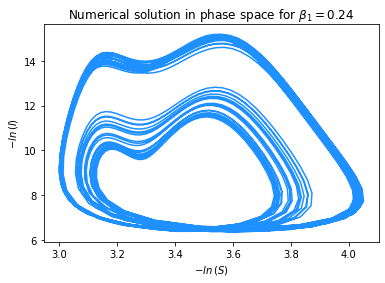

In [9]:
# enables latex typesetting in plots
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')

# plot of numerical solution in phase space
plt.plot(-np.log(ys[17500:19500]), -np.log(yi[17500:19500]), "dodgerblue") 

# horizontal axis label
plt.xlabel(r'$-ln\,\left(S\right)$')

# vertical axis label
plt.ylabel(r'$-ln\,\left(I\right)$')

# plot title
plt.title(r'Numerical solution in phase space for $\beta_{1} = 0.24$')

# saves resulting figure
plt.savefig("C:/Users/domem/OneDrive/Documents/APHA-pres/chaos.pdf", bbox_inches='tight')

Then, let's plot the time series for the proportion of infected.

C:\Users\domem\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


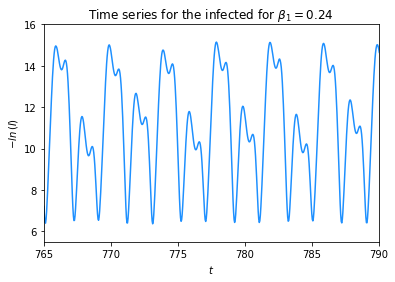

In [11]:
# time series plot
plt.plot(t, -np.log(yi), "dodgerblue") 

# sets vertical axis range
plt.ylim(5.5,16)

# sets horizontal axis range
plt.xlim(765,790)

# horizontal axis label
plt.xlabel(r'$t$')

# vertical axis label
plt.ylabel(r'$-ln\,\left(I\right)$')

# plot title
plt.title(r'Time series for the infected for $\beta_{1}=0.24$')

# saves resulting figure
plt.savefig("C:/Users/domem/OneDrive/Documents/APHA-pres/chaos2.pdf", bbox_inches='tight')